In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [6]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Keras modules

In [9]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling2D

## Cargo datos

In [10]:
from keras.datasets import cifar10
((x, y), (x_test,y_test)) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

## Paso a float

In [12]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

In [13]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

## Red neuronal: CNN tipo AlexNet

In [14]:
model = Sequential()

model.add(Conv2D(filters=20, kernel_size=(11, 11), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=20, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=20, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=20, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 20)        7280      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 20)        3620      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1

In [15]:
# Callbacks
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=2)
checkpointer = ModelCheckpoint(filepath='checkpoint.cifar10-cnn-tipoAlexNet.hdf5', verbose=1, save_best_only=True)

In [16]:
x_train.shape

(45000, 32, 32, 3)

In [17]:
y_train_categorical.shape

(45000, 10)

In [ ]:
batch_size = 64
epocs = 100

history = model.fit(x_train, 
        y_train_categorical,
        epochs=epocs, batch_size=batch_size, 
        verbose=2, 
        validation_data = (x_valid, y_val_categorical),
        callbacks=[checkpointer, earlystop],
    )

Epoch 1/100
704/704 - 167s - loss: 1.9938 - accuracy: 0.2430 - val_loss: 1.7341 - val_accuracy: 0.3698

Epoch 00001: val_loss improved from inf to 1.73412, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 2/100
704/704 - 167s - loss: 1.7006 - accuracy: 0.3682 - val_loss: 1.5566 - val_accuracy: 0.4302

Epoch 00002: val_loss improved from 1.73412 to 1.55656, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 3/100
704/704 - 173s - loss: 1.5859 - accuracy: 0.4204 - val_loss: 1.4676 - val_accuracy: 0.4708

Epoch 00003: val_loss improved from 1.55656 to 1.46759, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 4/100
704/704 - 173s - loss: 1.5158 - accuracy: 0.4527 - val_loss: 1.4099 - val_accuracy: 0.4994

Epoch 00004: val_loss improved from 1.46759 to 1.40987, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 5/100
704/704 - 182s - loss: 1.4516 - accuracy: 0.4754 - val_loss: 1.4575 - val_accuracy: 0.4856

Epoch 00005: val_loss did not improv

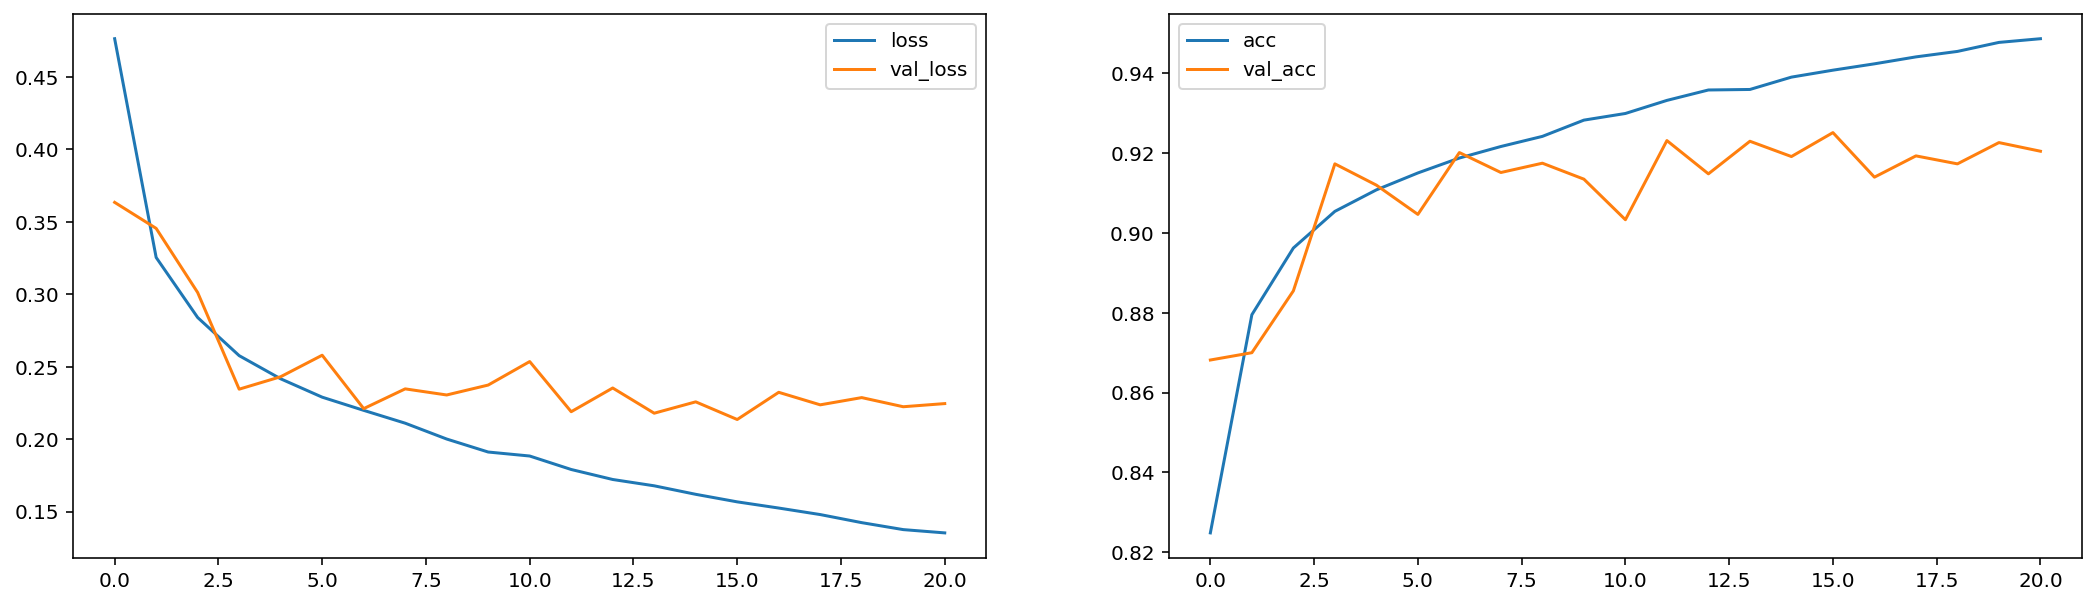

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))
ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history.history['acc'], label="acc")
ax2.plot(history.history['val_acc'], label="val_acc")
ax2.legend()
plt.show();

In [ ]:
model.load_weights('checkpoint.mnist-cnn.hdf5')